# Lab 5

## Exercise 1

The following four code snippets are used to find the differences in the Filters Used and Processed Images created when either the angle or the frequency of the gabor filter are changed. The image "15.bmp" contained in the "right_thumb" subdirectory of the "BTLab_Fingerprints" folder was used for this exercise. The first code snippet uses an angle of $\frac{-\pi}{8}$ and a frequency of 0.11, the second code snippet uses an angle of $\pi$ and a frequency of 0.11, the third code snippet uses an angle of $\frac{\pi}{4}$ and a frequency of 0.20, and the fourth code snippet uses an angle of $\frac{\pi}{4}$ and a frequency of 0.05. As can be seen through the images, the angle and the frequency used for the gabor template have a great effect on the filter created and the final processed image. 

When keeping the frequency constant at 0.11 and changing the angle of the gabor template from $\frac{-\pi}{8}$ to $\pi$, it is obvious from the filter images displayed that the filter is rotated based on the angle specified. The filter displayed that was created with the angle $\frac{-\pi}{8}$ is rotated slightly to the left when we compare it to the filter that was created with the angle $\pi$ (which is displayed straight). This also seems to heavily impact the processed image created as the ridges of the fingerprints in the processed image seem to follow the angle used to create the gabor template. The processed image that was created using an angle of $\frac{-\pi}{8}$ has ridge lines that are tilted slightly to the left just like the displayed gabor filter image. On the other hand, the processed image that was created using an angle of $\pi$ has ridge lines that are straight just like the displayed gabor filter. Through this, it is clearly important to set a proper angle in order to create a proper gabor template in order to filter fingerprints.

When keeping the angle constant at $\frac{\pi}{4}$ and changing the frequency of the gabor template from 0.20 to 0.05, it becomes obvious from the filter images that the filter is image is either more clearer or more pixelated. This may be due to the scale of the image as in the filter image where a frequency of 0.20 was used, the x and y axis only range from 0-20 while on the filter image where a frequency of 0.05 was used, the x and y axis range from 0-125. As a result of this scale, the filter image where a frequency of 0.05 was used seems to have a higher resolution than the filter image where a frequency of 0.05 was used (the image is more blocky when a frequency of 0.20 is used and smoother when a frequency of 0.05 is used). This seems to greatly impact the processed image created as it seems to affect the length of ridge lines created in the processed image. When a frequency of 0.20 is used, the ridge lines created on the processed image are shorter than the ridge lines created on the processed image when a frequency of 0.05 is used. This also affects the number of ridge lines in the processed image as bigger ridge lines leads to overall lower amount of ridge lines in the image, while there are more ridge lines displayed when each ridge line is smaller. Overall, it seems that setting a proper frequency is important in creating a proper gabor template in order to filter fingerprints.

All code taken from Lab05-Fingerprint2gab-2023W on D2L.

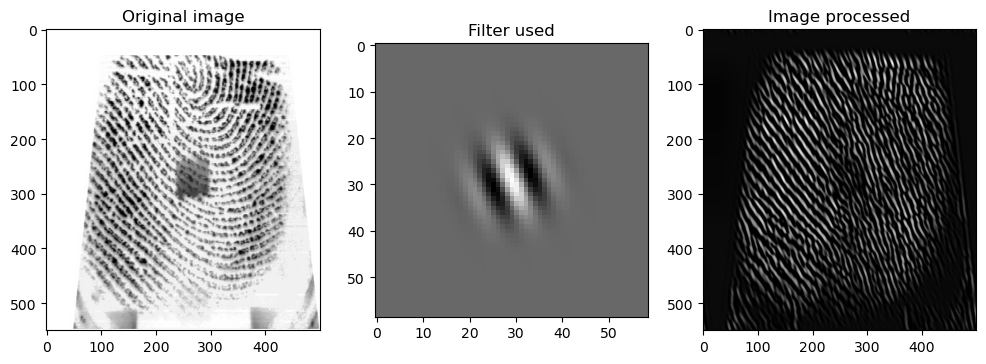

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import ndimage as ndi

from skimage.io import imread
from skimage.filters import gabor_kernel
from skimage.util import invert
from skimage.exposure import equalize_adapthist

# custom functions
from utils.blockproc import blockproc

def gabor_filtering(img, fi):
    # 'mode' specifies how the convolution algorithm will deal with the borders
    If1 = equalize_adapthist(ndi.convolve(img, fi, mode='wrap'))
    # normalize
    If1 = ((If1 - np.min(If1)) / (np.max(If1) - np.min(If1))) * 255
    #print(np.min(If1), np.max(If1))
    
    return If1

# create the filter according to the size of the image
def gabor_template(im, angle, freq=0.11):
    r, c = im.shape
    ysize = int(np.floor(r/10))

    t = int(np.floor(ysize/8))
    fi = np.real(gabor_kernel(freq, theta=angle, n_stds=t))
    
    return fi

# the image loaded is already [0,1]
img = imread('BTLab_Fingerprints/right_thumb/15.bmp', as_gray=True)

# create a gabor template and then use it to perform filtering
fi = gabor_template(img, angle=-np.pi/8)
img_f = gabor_filtering(img, fi)

# plot the original image, the filter used, and the processed image
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray'); plt.title('Original image')
plt.subplot(1,3,2)
plt.imshow(fi, cmap='gray'); plt.title('Filter used')
plt.subplot(1,3,3)
plt.imshow(img_f, cmap='gray'); plt.title('Image processed');

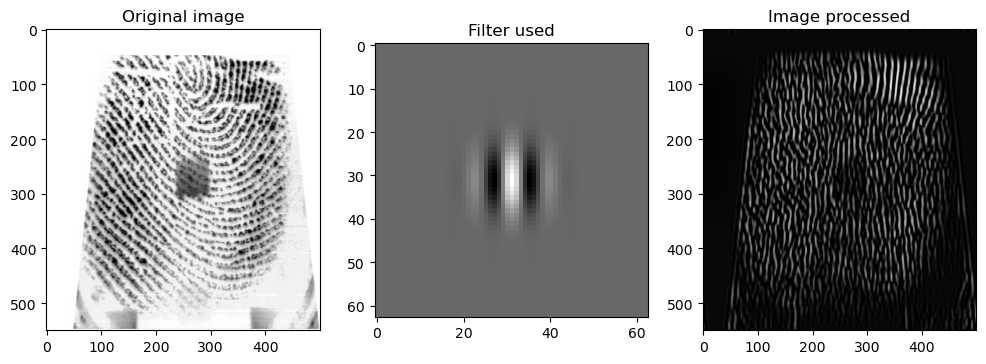

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import ndimage as ndi

from skimage.io import imread
from skimage.filters import gabor_kernel
from skimage.util import invert
from skimage.exposure import equalize_adapthist

# custom functions
from utils.blockproc import blockproc

def gabor_filtering(img, fi):
    # 'mode' specifies how the convolution algorithm will deal with the borders
    If1 = equalize_adapthist(ndi.convolve(img, fi, mode='wrap'))
    # normalize
    If1 = ((If1 - np.min(If1)) / (np.max(If1) - np.min(If1))) * 255
    #print(np.min(If1), np.max(If1))
    
    return If1

# create the filter according to the size of the image
def gabor_template(im, angle, freq=0.11):
    r, c = im.shape
    ysize = int(np.floor(r/10))

    t = int(np.floor(ysize/8))
    fi = np.real(gabor_kernel(freq, theta=angle, n_stds=t))
    
    return fi

# the image loaded is already [0,1]
img = imread('BTLab_Fingerprints/right_thumb/15.bmp', as_gray=True)

# create a gabor template and then use it to perform filtering
fi = gabor_template(img, angle=np.pi)
img_f = gabor_filtering(img, fi)

# plot the original image, the filter used, and the processed image
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray'); plt.title('Original image')
plt.subplot(1,3,2)
plt.imshow(fi, cmap='gray'); plt.title('Filter used')
plt.subplot(1,3,3)
plt.imshow(img_f, cmap='gray'); plt.title('Image processed');

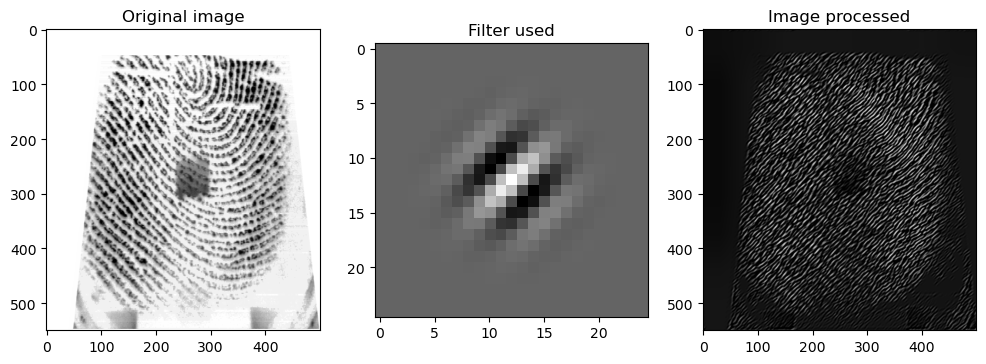

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import ndimage as ndi

from skimage.io import imread
from skimage.filters import gabor_kernel
from skimage.util import invert
from skimage.exposure import equalize_adapthist

# custom functions
from utils.blockproc import blockproc

def gabor_filtering(img, fi):
    # 'mode' specifies how the convolution algorithm will deal with the borders
    If1 = equalize_adapthist(ndi.convolve(img, fi, mode='wrap'))
    # normalize
    If1 = ((If1 - np.min(If1)) / (np.max(If1) - np.min(If1))) * 255
    #print(np.min(If1), np.max(If1))
    
    return If1

# create the filter according to the size of the image
def gabor_template(im, angle, freq=0.20):
    r, c = im.shape
    ysize = int(np.floor(r/10))

    t = int(np.floor(ysize/8))
    fi = np.real(gabor_kernel(freq, theta=angle, n_stds=t))
    
    return fi

# the image loaded is already [0,1]
img = imread('BTLab_Fingerprints/right_thumb/15.bmp', as_gray=True)

# create a gabor template and then use it to perform filtering
fi = gabor_template(img, angle=np.pi/4)
img_f = gabor_filtering(img, fi)

# plot the original image, the filter used, and the processed image
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray'); plt.title('Original image')
plt.subplot(1,3,2)
plt.imshow(fi, cmap='gray'); plt.title('Filter used')
plt.subplot(1,3,3)
plt.imshow(img_f, cmap='gray'); plt.title('Image processed');

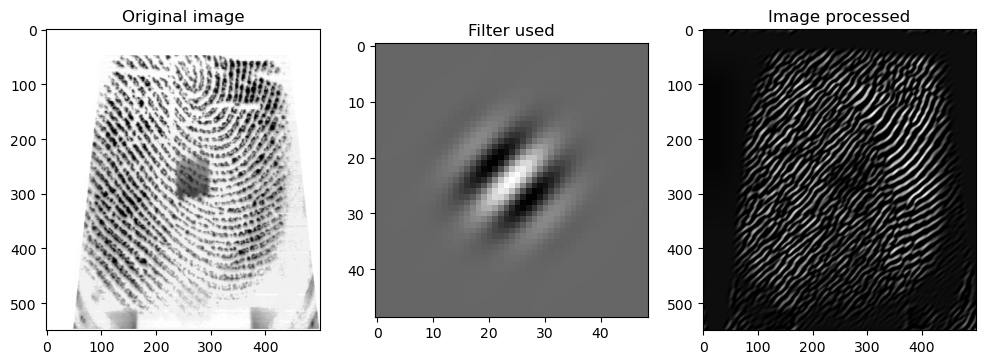

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import ndimage as ndi

from skimage.io import imread
from skimage.filters import gabor_kernel
from skimage.util import invert
from skimage.exposure import equalize_adapthist

# custom functions
from utils.blockproc import blockproc

def gabor_filtering(img, fi):
    # 'mode' specifies how the convolution algorithm will deal with the borders
    If1 = equalize_adapthist(ndi.convolve(img, fi, mode='wrap'))
    # normalize
    If1 = ((If1 - np.min(If1)) / (np.max(If1) - np.min(If1))) * 255
    #print(np.min(If1), np.max(If1))
    
    return If1

# create the filter according to the size of the image
def gabor_template(im, angle, freq=0.1):
    r, c = im.shape
    ysize = int(np.floor(r/10))

    t = int(np.floor(ysize/8))
    fi = np.real(gabor_kernel(freq, theta=angle, n_stds=t))
    
    return fi

# the image loaded is already [0,1]
img = imread('BTLab_Fingerprints/right_thumb/15.bmp', as_gray=True)

# create a gabor template and then use it to perform filtering
fi = gabor_template(img, angle=np.pi/4)
img_f = gabor_filtering(img, fi)

# plot the original image, the filter used, and the processed image
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray'); plt.title('Original image')
plt.subplot(1,3,2)
plt.imshow(fi, cmap='gray'); plt.title('Filter used')
plt.subplot(1,3,3)
plt.imshow(img_f, cmap='gray'); plt.title('Image processed');

## Exercise 2

In this exercise, the image "10.bmp" contained in the "left_thumb" subdirectory of the "BTLab_Fingerprints" folder was used as the probe image. The images "1.bmp", "2.bmp", "3.bmp", "4.bmp", "5.bmp", "6.bmp", "7.bmp", "8.bmp", and "9.bmp" contained in the "left_thumb" subdirectory of the "BTLab_Fingerprints" folder were used as the database images. The probe image was used in 1 to 1 minutiae based matching with each of these database images and their matching scores were printed and are displayed in the table below. The 1.bmp-9.bmp images mentioned above are given indexes ranging from FP1-FP9 to indicate the matching score of each image with the probe image (for easier readability in the table below).

|Index |Matching Score|
|------|--------------|
|FP1   |0.0483        |
|FP2   |0.0323        |
|FP3   |0.0499        |
|FP4   |0.0405        |
|FP5   |0.0444        |
|FP6   |0.0390        |
|FP7   |0.0493        |
|FP8   |0.0181        |
|FP9   |0.0937        |

Based on the above scores, I believe that an appropriate matching score threshold would be 0.04 as most of the matching scores seems to hover around this number. Based on this threshold, there are three values that are below this threshold: FP2(2.bmp): 0.0323, FP6(6.bmp): 0.0390, and FP8(8.bmp): 0.0181. As a result, the number of False Negatives detected is 3. On the other hand, this also means that there are 6 values that are above this threshold: FP1(1.bmp): 0.0483, FP3(3.bmp): 0.0499, FP4(4.bmp): 0.0405, FP5(5.bmp): 0.0444, FP7(7.bmp): 0.0493, and FP9(9.bmp): 0.0937. For this reason, the number of True Positives detected is 6.

The matching score threshold that is picked greatly affects the number of False Negatives and True Positives that are detected as a result of the matching scores. For example, if I were to pick a matching score threshold of 0.05 and use the above scores, then that would mean that there would only be 1 matching score that is above the threshold and the other 8 matching scores would be below this threshold. Thus, there would only be 1 True Positive and 8 False Negatives. This could either mean that our matching decisions are more strict due to this higher threshold and only high quality fingerprints of the same individual are considered True Positives, or it could mean that our matching decisions are too infexible and most fingerprints from the same individual are being rejected. On the contrary, we could lower the threshold to say 0.01. This would make it so that all of the 9 matching scores are above the threshold. In this case, there would then be 9 True Positives. While this is ideal, the problem with this approach, however, is that lowering the threshold by a great margin makes it easier for more False Positives to be detected as the threshold is relatively easier to cross. As a result, it becomes important to choose a threshold that maximizes the number of True Positives found while minimizing the number of False Positives found and minimizing the number of False Negatives found (although there are no False Positivies in this exercise as all fingerprints are from the same person). 

All code taken from Lab05-Fingerprint2-Minutiae-2023W on D2L.

In [1]:
import cv2 as cv
import numpy as np

from skimage.io import imread, imsave
from skimage.util import img_as_ubyte, invert
from skimage.exposure import equalize_hist, equalize_adapthist
from skimage.filters import median, gaussian

from utils.poincare import calculate_singularities
from utils.segmentation import segmentation
from utils.normalization import normalize
from utils.gabor_filter import gabor_filter
from utils.frequency import ridge_freq
from utils.orientation import calculate_angles, visualize_angles
from utils.crossing_number import calculate_minutiae
from utils.skeletonize import skeletonize
from utils.align2 import align2
from utils.MatchGaborFeat import MatchGaborFeat
from utils.align2 import align2
from utils.match import match

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import matplotlib as mpl
# setting the default colormap for images only
mpl.rc('image', cmap='gray')

from utils.MatchGaborFeat import MatchGaborFeat

def fingerprint_processing(img, block_size=16, threshold=0.4):
    output = {}
    
    # normalization - removes the effects of sensor noise and finger pressure differences.
    normalized_img = normalize(img.copy(), float(100), float(100))
    output['normalized_img'] = normalized_img
    
    # segmentation
    (segmented_img, normim, mask) = segmentation(normalized_img, 
                                                 block_size, 
                                                 threshold)
    output['segmented_img'] = segmented_img
    output['normim'] = normim
    output['mask'] = mask
    
    # orientation estimation
    angles = calculate_angles(normalized_img, 
                              W=block_size, smooth=True)
    output['angles'] = angles
    
    # find the overall frequency of ridges
    freq = ridge_freq(normim, mask, angles, 
                      block_size, kernel_size=5, 
                      minWaveLength=5, maxWaveLength=15)
    output['freq'] = freq
    
    # create gabor filter and do the actual filtering
    gabor_img = gabor_filter(normim, angles, freq, block_size)
    output['gabor_img'] = gabor_img
    
    # create the skeleton
    thin_image = skeletonize(gabor_img)
    output['thin_image'] = thin_image
    
    # find the minutiae
    minutiae_lst, minutiae_img, minutiae_arr = calculate_minutiae(thin_image, mask)
    output['minutiae_lst'] = minutiae_lst
    output['minutiae_img'] = minutiae_img
    output['minutiae_array'] = minutiae_arr
    
    # singularities
    singularities_lst, singularities_img = calculate_singularities(thin_image, 
                                                                   angles, block_size, 
                                                                   mask)
    output['singularities_lst'] = singularities_lst
    output['singularities_img'] = singularities_img
    
    return output

# database images
img_database = []
for i in range(1, 10):
    dir = 'BTLab_Fingerprints/left_thumb/'
    file = dir + str(i) + '.bmp'
    img_database.append(img_as_ubyte(imread(file, as_gray=True)))
    
# probe image
im_probe = img_as_ubyte(imread('BTLab_Fingerprints/left_thumb/10.bmp', as_gray=True))
fp_probe = (fingerprint_processing(im_probe, block_size=12, threshold=0.1))

fp_database = []
# pre-process each image
for x in img_database:
    fp_database.append(fingerprint_processing(x, block_size=12, threshold=0.1))

# for every processed database fingerprint, match the processed probe fingerprint and then print the score
for x in fp_database:
    imSkeletonAlign, minutiaArrayAlign = align2(fp_probe, x)
    x['imSkeletonAlign'] = imSkeletonAlign
    x['minutiaArrayAlign'] = minutiaArrayAlign

    match_threshold = 6
    score = match(fp_probe, x, threshold2=match_threshold)
    print('score for minutiae for database image: %.4f\n' % (score))
    print('\n')

number of matched minutiae: 106
distance total computed : 498
number of minutiae in input image: 4005
number of minutiae in database image: 383
score for minutiae for database image: 0.0483



number of matched minutiae: 80
distance total computed : 353
number of minutiae in input image: 4564
number of minutiae in database image: 383
score for minutiae for database image: 0.0323



number of matched minutiae: 59
distance total computed : 272
number of minutiae in input image: 1982
number of minutiae in database image: 383
score for minutiae for database image: 0.0499



number of matched minutiae: 78
distance total computed : 357
number of minutiae in input image: 3468
number of minutiae in database image: 383
score for minutiae for database image: 0.0405



number of matched minutiae: 98
distance total computed : 421
number of minutiae in input image: 4029
number of minutiae in database image: 383
score for minutiae for database image: 0.0444



number of matched minutiae: 72
distance

## Exercise 3

In this exercise, the image "10.bmp" contained in the "left_thumb" subdirectory of the "BTLab_Fingerprints" folder was used as the probe image. The images "1.bmp", "2.bmp", "3.bmp", "4.bmp", "5.bmp", "6.bmp", "7.bmp", "8.bmp", and "9.bmp" contained in the "left_thumb" subdirectory of the "BTLab_Fingerprints" folder were used as the database images. The probe image was used in 1 to 1 matching, using the Gabor Filter based approach, with each of these database images and their matching scores were printed and are displayed in the table below. The 1.bmp-9.bmp images mentioned above are given indexes ranging from FP1-FP9 to indicate the matching score of each image with the probe image (for easier readability in the table below).

|Index |Matching Score|
|------|--------------|
|FP1   |16.4059       |
|FP2   |15.9164       |
|FP3   |14.2066       |
|FP4   |15.3472       |
|FP5   |14.2638       |
|FP6   |14.5489       |
|FP7   |14.6564       |
|FP8   |14.6795       |
|FP9   |13.2641       |

As lower scores are a better result when using the Gabor filter, this means that scores that are below the threshold are considered to be True Positives and scores that are above the threshold are considered to be False Negatives. Based on the above scores, I believe that an appropriate matching score threshold would be 14.7. Based on this threshold, there are three values that are above this threshold: FP1(1.bmp): 16.4059, FP2(2.bmp): 15.9164, and FP4(4.bmp): 15.3472. As a result, the number of False Negatives detected is 3. On the other hand, this also means that there are 6 values that are below this threshold: FP3(3.bmp): 14.2066, FP5(5.bmp): 14.2638, FP6(6.bmp): 14.5489, FP7(7.bmp): 14.6564, FP8(8.bmp): 14.6795 and FP9(9.bmp): 13.2641. For this reason, the number of True Positives detected is 6.

In terms of the number of True Positives and False Negatives found in the Minutiae based matching and the matching performed with the Gabor Filter approach, they are the same. As a result of the thresholds that I picked for both the Minutiae based matching and the Gabor Filter approach, the number of True Positives found was 6 and the number of False Negatives found was 3 in both instances. Another similarity was that both of these methods found that FP9, or 9.bmp, was the fingerprint that matched the probe image, or 10.bmp, the most. In the Minutiae based matching, FP9 had a matching score of 0.0937 which was higher than any other fingerprint and in the Gabor Filter approach, FP9 had a score of 13.2641 which was lower than any other fingerprint. On top of this, both methods found that FP2, or 2.bmp, was one of the fingerprints that least matched the probe image. The Minutiae based matching found a matching score of 0.0323 for FP2 and the Gabor Filter approach found a matching score of 15.9164. There are also some differences between the two approaches. The Minutiae based matching found that FP6 and FP8 were least likely to match the probe fingerprint with scores of 0.0390 and 0.0181 respectively. On the other hand, the Gabor Filter approach found that FP1 and FP4 were the least likely to match the probe fingerprint with scores of 16.4059 and 15.3472 respectively. There is a clear difference here between the two approaches as the Minutiae based approach found that the fingerprint in the file 8.bmp was least likely to match the probe image while the Gabor Filter approach found that the fingeprint in file 1.bmp was least likely to match the probe image. As a result, these two approaches are not exactly equivalent approaches and instead produce vastly different results. 

All code taken from Lab05-Fingerprint2-GaborFeatures-2023W on D2L.

Score using Gabor features: 16.4059
Score using Gabor features: 15.9164
Score using Gabor features: 14.2066
Score using Gabor features: 15.3472
Score using Gabor features: 14.2638
Score using Gabor features: 14.5489
Score using Gabor features: 14.6564
Score using Gabor features: 14.6795
Score using Gabor features: 13.2641


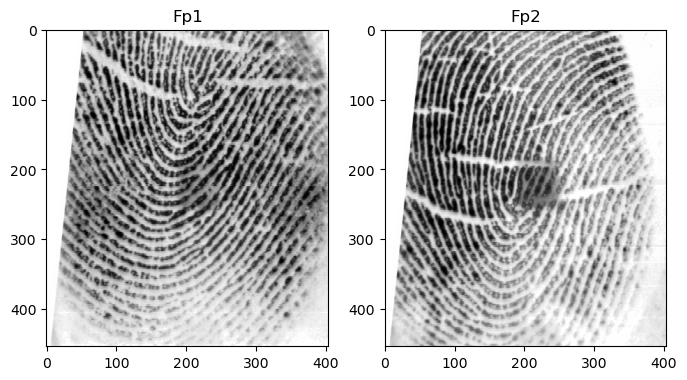

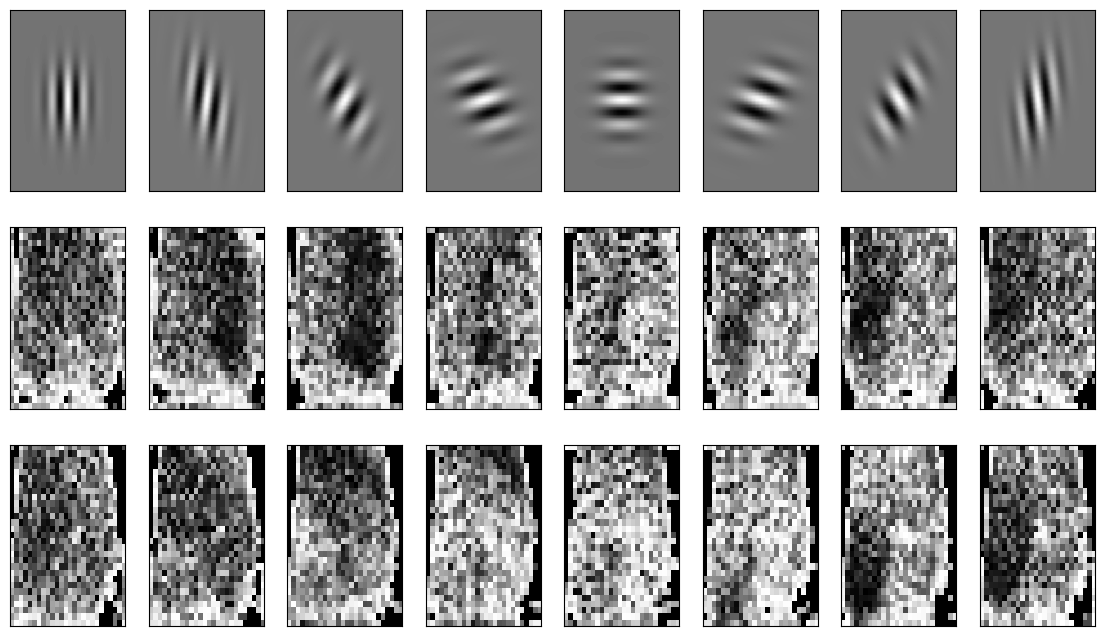

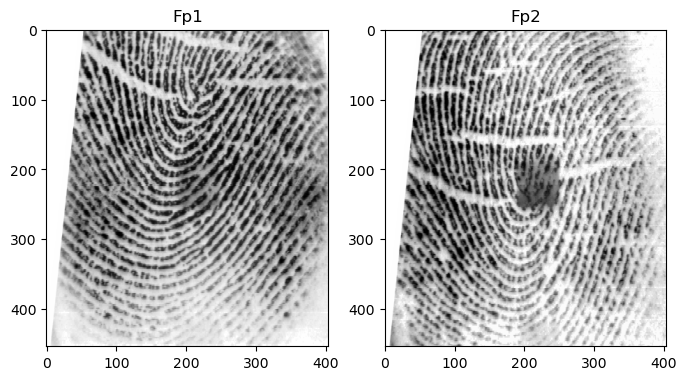

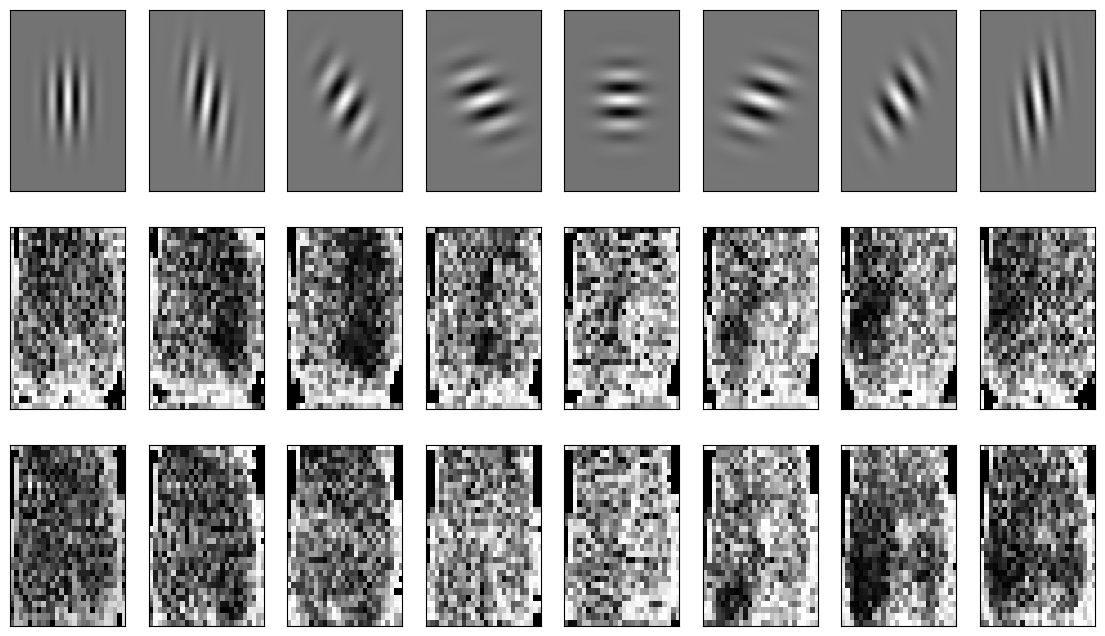

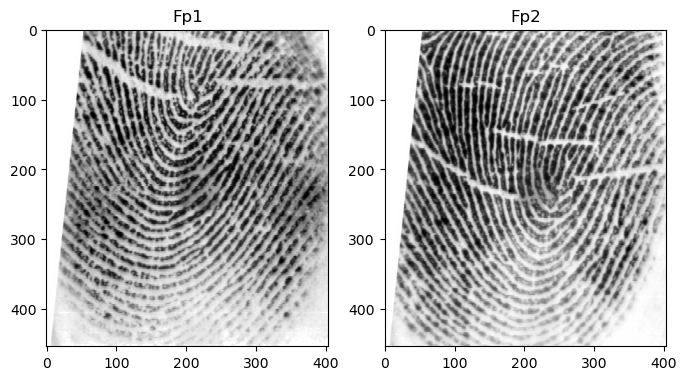

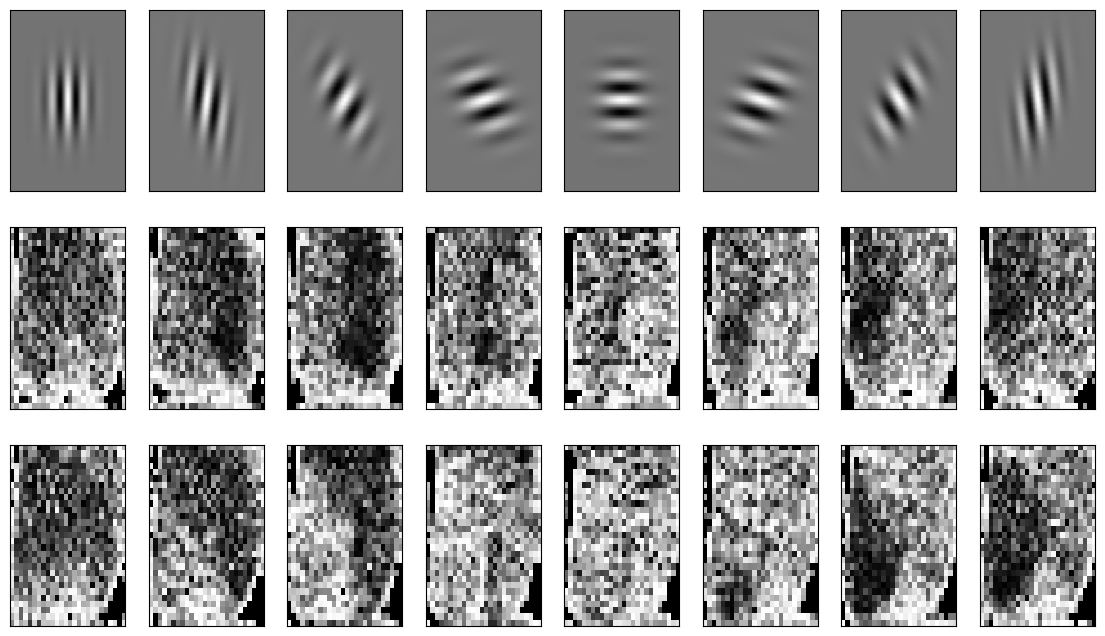

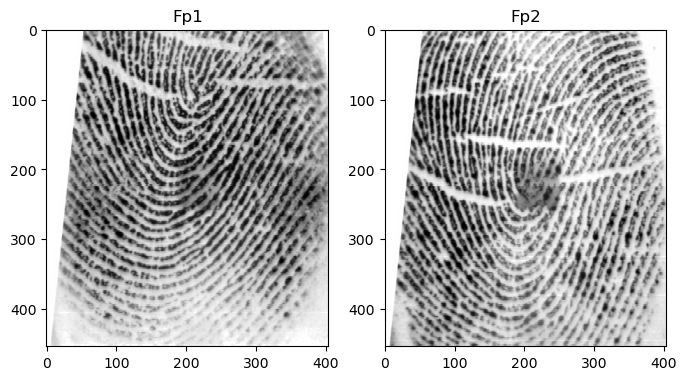

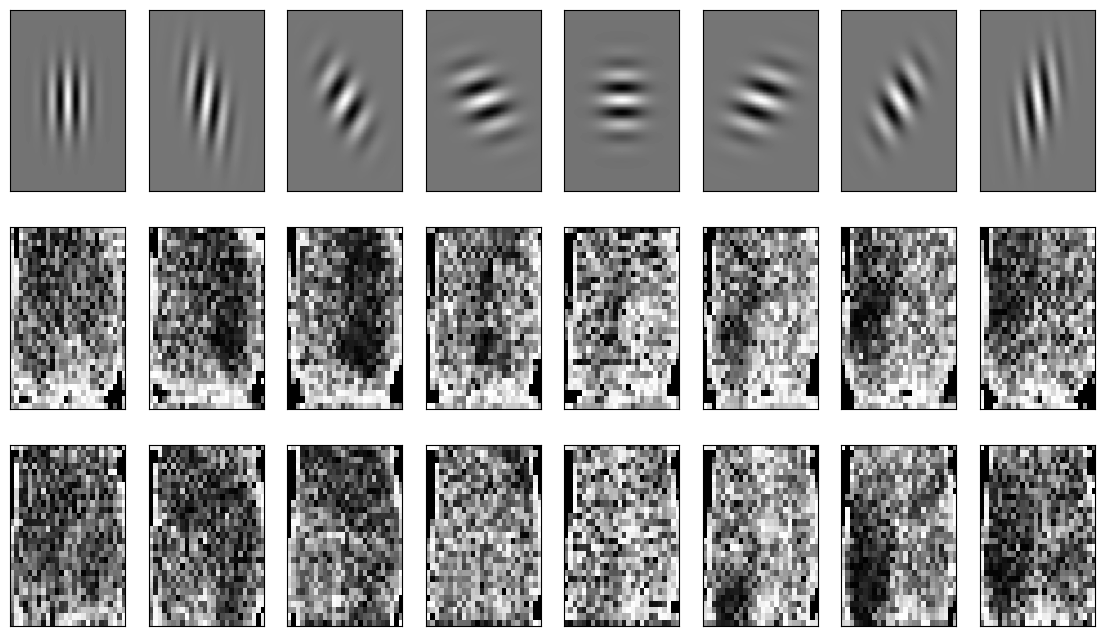

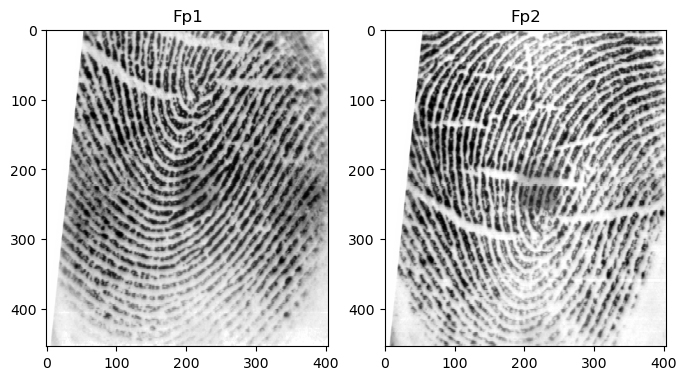

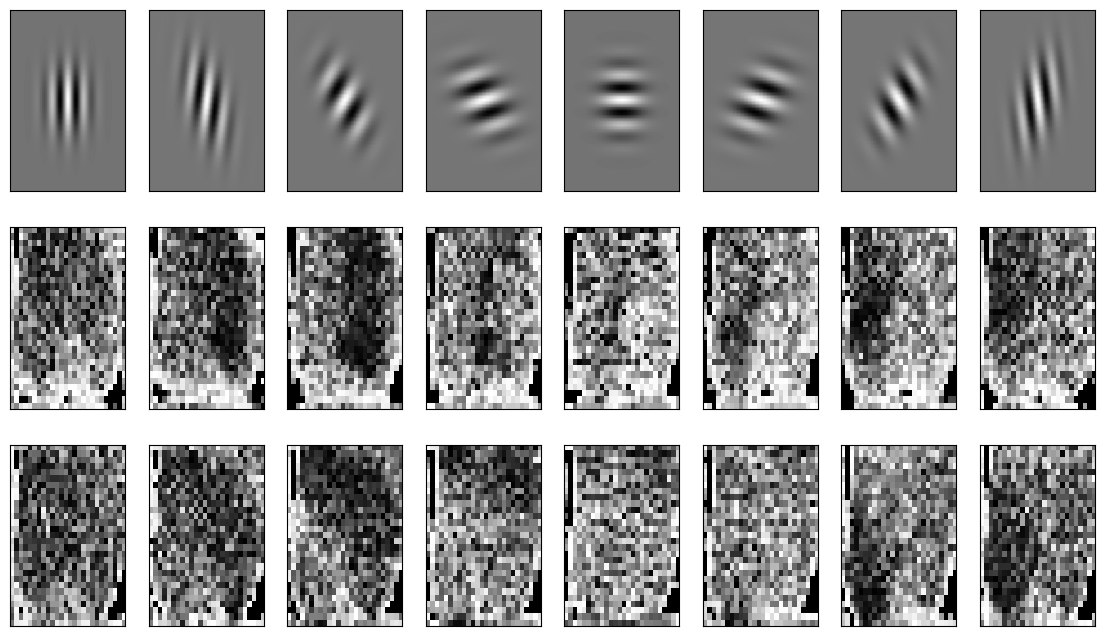

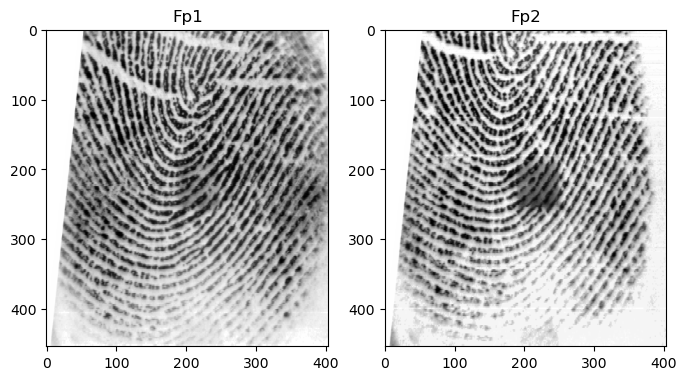

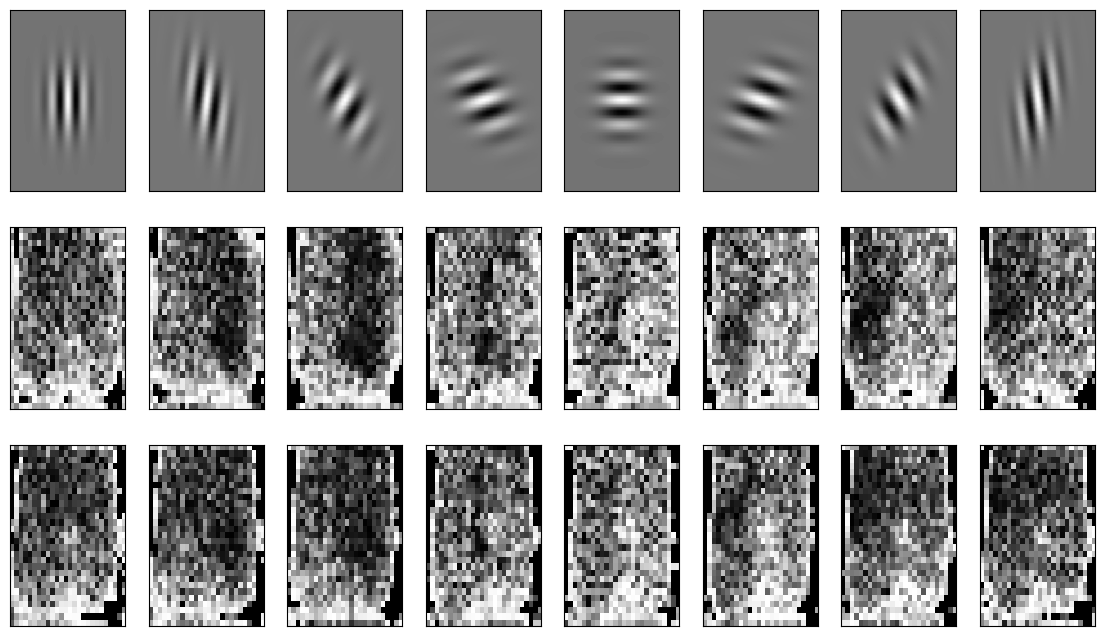

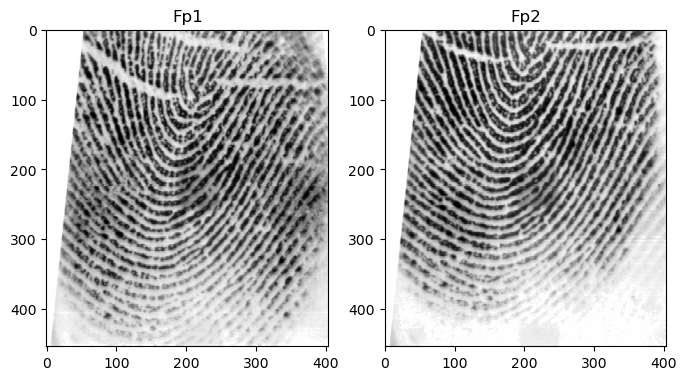

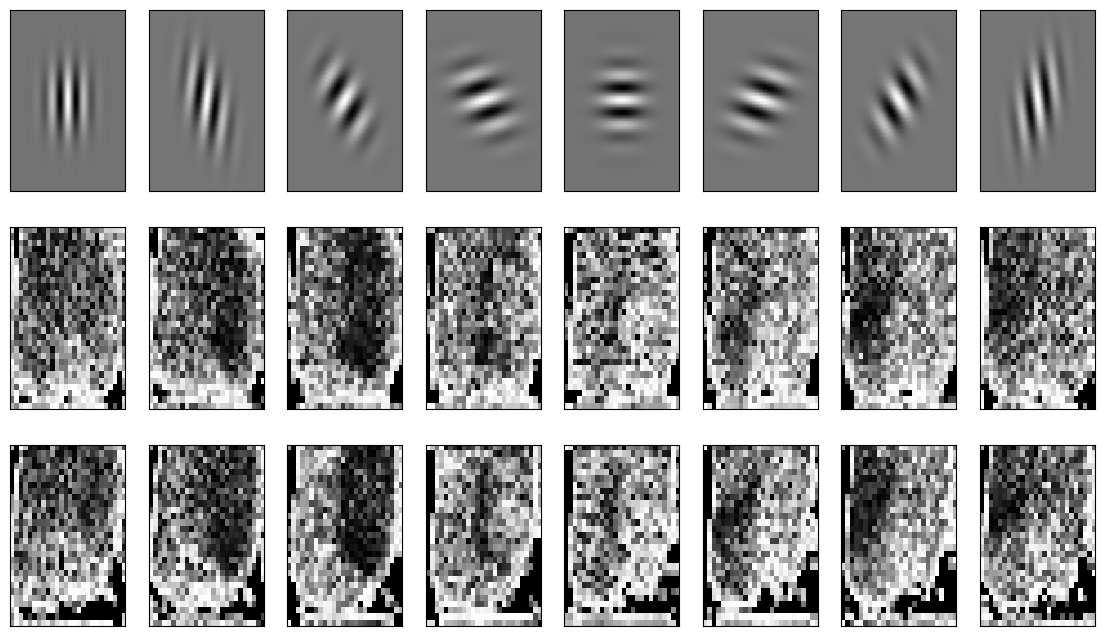

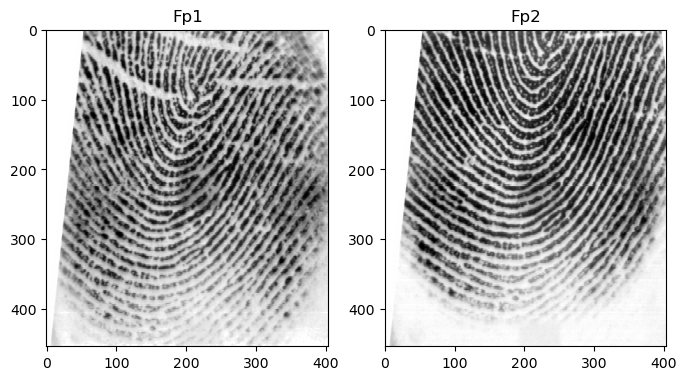

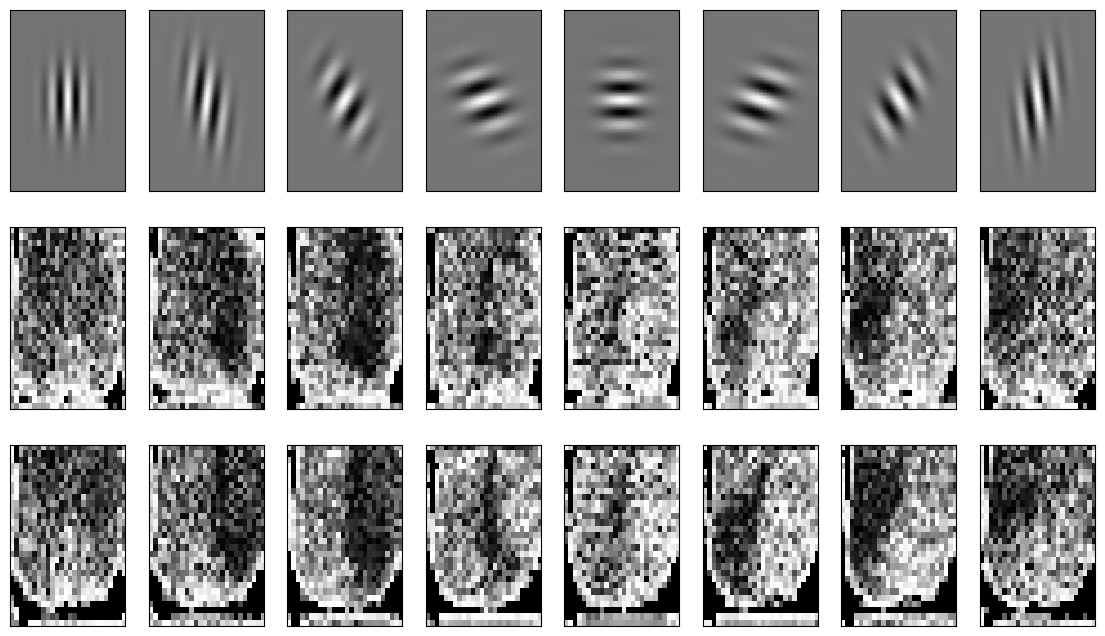

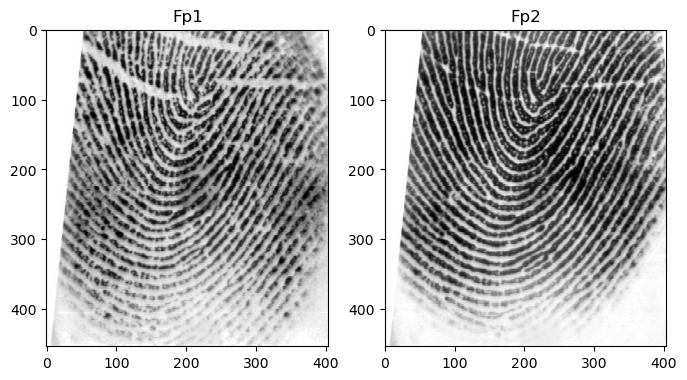

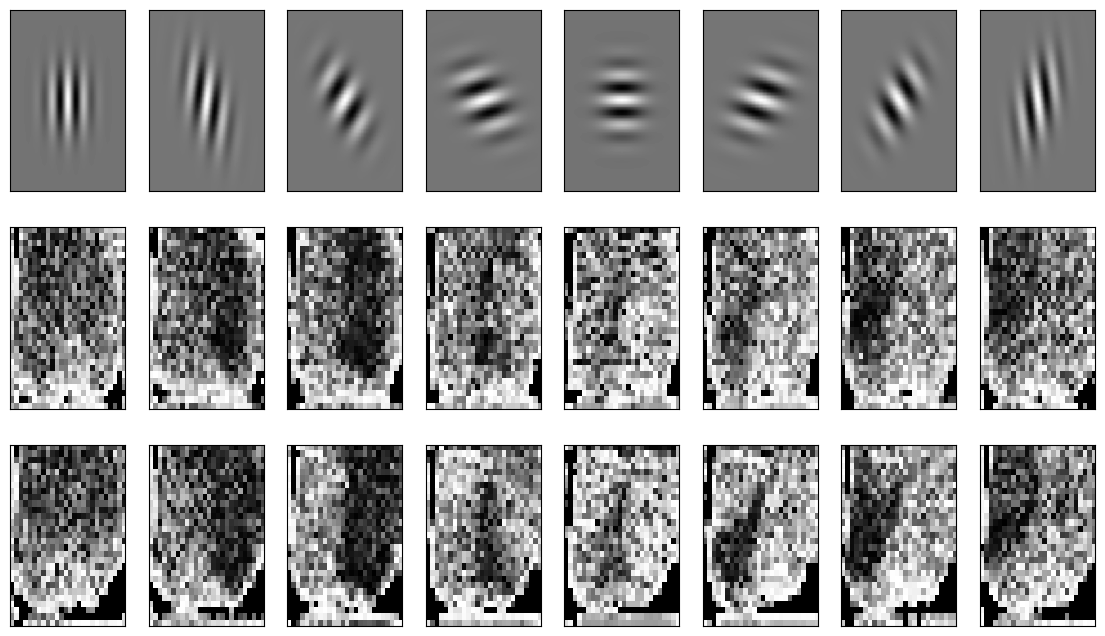

In [4]:
import cv2 as cv
import numpy as np

from skimage.io import imread, imsave
from skimage.util import img_as_ubyte, invert
from skimage.exposure import equalize_hist, equalize_adapthist
from skimage.filters import median, gaussian

from utils.poincare import calculate_singularities
from utils.segmentation import segmentation
from utils.normalization import normalize
from utils.gabor_filter import gabor_filter
from utils.frequency import ridge_freq
from utils.orientation import calculate_angles, visualize_angles
from utils.crossing_number import calculate_minutiae
from utils.skeletonize import skeletonize
from utils.align2 import align2
from utils.MatchGaborFeat import MatchGaborFeat
from utils.align2 import align2
from utils.match import match
from sklearn.feature_extraction.image import extract_patches_2d

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import matplotlib as mpl
# setting the default colormap for images only
mpl.rc('image', cmap='gray')

from utils.MatchGaborFeat import MatchGaborFeat

# database images
img_database = []
for i in range(1, 10):
    dir = 'BTLab_Fingerprints/left_thumb/'
    file = dir + str(i) + '.bmp'
    img_database.append(img_as_ubyte(imread(file, as_gray=True)))
    
# probe image
im_probe = img_as_ubyte(imread('BTLab_Fingerprints/left_thumb/10.bmp', as_gray=True))

# for every database fingerprint, match the probe fingerprint and then print the score
for x in img_database:
    score1 = MatchGaborFeat(im_probe, x, plot_res=True)
    print('Score using Gabor features: %.4f' % (score1))

## Exercise 4

In this exercise, the image "2.bmp" contained in the "left_thumb" subdirectory of the "BTLab_Fingerprints" folder was used as the probe image. Also, the image "1.bmp" in that same subdirectory and folder ("left_thumb" of "BTLab_Fingerprints") is used as one of the database images. The images "10.bmp", "11.bmp", "12.bmp", "13.bmp", "14.bmp", "15.bmp", "16.bmp", "17.bmp", "18.bmp", and "19.bmp" contained in the "right_thumb" subdirectory of the "BTLab_Fingerprints" folder were used as the other 10 database images. The probe image was used in 1 to 1 Minutiae based matching with each of these database images and their matching scores were printed and are displayed in the table below. The 1.bmp image from the "left_thumb", which is considered to be from the same individual as the probe image, that is used as a part of the database images above is given the index of FP1(left). Also, the 10.bmp-19.bmp images that are from the "right_thumb" and are used as a part of the database images above are given indexes ranging from FP2-FP11 to indicate the matching score of each image with the probe image (for easier readability in the table below).

|Index |Matching Score|
|------|--------------|
|FP1(left)   |0.0946        |
|FP2   |0.0730        |
|FP3   |0.0734        |
|FP4   |0.0757        |
|FP5   |0.0741        |
|FP6   |0.0723        |
|FP7   |0.0512        |
|FP8   |0.0000        |
|FP9   |0.0598        |
|FP10  |0.0523        |
|FP11  |0.0490        |

After sorting:

|Index |Matching Score|
|------|--------------|
|FP1(left)   |0.0946        |
|FP4   |0.0757        |
|FP5   |0.0741        |
|FP3   |0.0734        |
|FP2   |0.0730        |
|FP6   |0.0723        |
|FP9   |0.0598        |
|FP10  |0.0523        |
|FP7   |0.0512        |
|FP11  |0.0490        |
|FP8   |0.0000        |

FP1, which is the fingerprint contained in 1.bmp and is the fingerprint of the same individual as the probe image, is the fingerprint with the highest matching score and is at the top of the table/ranking. This fingerprint is considered the True Match and, as it is at the top of the ranking, we make it so that the threshold is slightly less than 0.946 but greater than the next biggest score which is 0.0757. For example, let's say the threshold is 0.094. With this threshold choice, the only matching score greater than the threshold is FP1: 0.0946 and all other matching scores are below this threshold. As FP1 is a fingerprint of the same individual as the probe image (1.bmp in the "left_thumb" subdirectory), then the number of True Positives is 1. Also, with this threshold, all other images from FP2-FP11 are below the threshold value (as they range from 0.00 to 0.0757). As the rest of the images, from FP2-FP11, are fingeprints of a different individual (10.bmp-19.bmp in the "right_thumb" subdirectory), all of these images are then considered True Negatives. Overall, there is then 1 True Positive, 0 False Negatives, 10 True Negatives, and 0 False Positives. 

In this exercise, as there is only 1 image from the same individual that is a part of the image database, it is not possible to detect any False Negatives (since it is not possible for an image from the same individual to be below the threshold value). For this reason, threshold choice would not affect the number of False Negatives detected. In the future, it would be best to include some more images from the same individual to be able to estimate the number of False Negatives using the Minutiae based approach and to gauge the effect of threshold choice on the number of False Negatives detected. However, the threshold choice affects the number of True Positives, True Negatives, and False Positives detected. If, in the above example, the threshold was lowered, then the number of False Positives detected would increase as there would be more fingerprints from a different individual that have a matching score above the threshold. At the same time, as a result of the increase in False Positives, the number of True Negatives would decrease. As this experiment only uses 1 image from the same individual as the probe image, lowering the threshold would not affect the number of True Positives detected. Once again, in the future, it would be best to include more images from the same individual to be able to estimate the effect of decreasing the threshold on the number of True Positives detected. Conversely, increasing the threshold would not effect the number of True Negatives or False Positives detected. However, this would result in the only True Positive to instead become a False Negative. Overall, it is incredibly important to pick an appropriate threshold while taking into considertaion the 4 metrics above in order to be able to properly detect fingerprints as being from a specific individual and being from different individuals.

All code taken from Lab05-Fingerprint2-Minutiae-2023W on D2L.

In [1]:
import cv2 as cv
import numpy as np

from skimage.io import imread, imsave
from skimage.util import img_as_ubyte, invert
from skimage.exposure import equalize_hist, equalize_adapthist
from skimage.filters import median, gaussian

from utils.poincare import calculate_singularities
from utils.segmentation import segmentation
from utils.normalization import normalize
from utils.gabor_filter import gabor_filter
from utils.frequency import ridge_freq
from utils.orientation import calculate_angles, visualize_angles
from utils.crossing_number import calculate_minutiae
from utils.skeletonize import skeletonize
from utils.align2 import align2
from utils.MatchGaborFeat import MatchGaborFeat
from utils.align2 import align2
from utils.match import match

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import matplotlib as mpl
# setting the default colormap for images only
mpl.rc('image', cmap='gray')

from utils.MatchGaborFeat import MatchGaborFeat

def fingerprint_processing(img, block_size=16, threshold=0.4):
    output = {}
    
    # normalization - removes the effects of sensor noise and finger pressure differences.
    normalized_img = normalize(img.copy(), float(100), float(100))
    output['normalized_img'] = normalized_img
    
    # segmentation
    (segmented_img, normim, mask) = segmentation(normalized_img, 
                                                 block_size, 
                                                 threshold)
    output['segmented_img'] = segmented_img
    output['normim'] = normim
    output['mask'] = mask
    
    # orientation estimation
    angles = calculate_angles(normalized_img, 
                              W=block_size, smooth=True)
    output['angles'] = angles
    
    # find the overall frequency of ridges
    freq = ridge_freq(normim, mask, angles, 
                      block_size, kernel_size=5, 
                      minWaveLength=5, maxWaveLength=15)
    output['freq'] = freq
    
    # create gabor filter and do the actual filtering
    gabor_img = gabor_filter(normim, angles, freq, block_size)
    output['gabor_img'] = gabor_img
    
    # create the skeleton
    thin_image = skeletonize(gabor_img)
    output['thin_image'] = thin_image
    
    # find the minutiae
    minutiae_lst, minutiae_img, minutiae_arr = calculate_minutiae(thin_image, mask)
    output['minutiae_lst'] = minutiae_lst
    output['minutiae_img'] = minutiae_img
    output['minutiae_array'] = minutiae_arr
    
    # singularities
    singularities_lst, singularities_img = calculate_singularities(thin_image, 
                                                                   angles, block_size, 
                                                                   mask)
    output['singularities_lst'] = singularities_lst
    output['singularities_img'] = singularities_img
    
    return output

# database images (1 of the individual (left_thumb) and 10 of another individual (right_thumb))
img_database = []
img_database.append(img_as_ubyte(imread('BTLab_Fingerprints/left_thumb/1.bmp', as_gray=True)))
for i in range(10, 20):
    dir = 'BTLab_Fingerprints/right_thumb/'
    file = dir + str(i) + '.bmp'
    img_database.append(img_as_ubyte(imread(file, as_gray=True)))
    
# probe image
im_probe = img_as_ubyte(imread('BTLab_Fingerprints/left_thumb/2.bmp', as_gray=True))
fp_probe = (fingerprint_processing(im_probe, block_size=12, threshold=0.1))

fp_database = []
# pre-process each image
for x in img_database:
    fp_database.append(fingerprint_processing(x, block_size=12, threshold=0.1))

# for every processed database fingerprint, match the processed probe fingerprint and then print the score
for x in fp_database:
    imSkeletonAlign, minutiaArrayAlign = align2(fp_probe, x)
    x['imSkeletonAlign'] = imSkeletonAlign
    x['minutiaArrayAlign'] = minutiaArrayAlign

    match_threshold = 6
    score = match(fp_probe, x, threshold2=match_threshold)
    print('score for minutiae for database image: %.4f\n' % (score))
    print('\n')

number of matched minutiae: 256
distance total computed : 1188
number of minutiae in input image: 4571
number of minutiae in database image: 839
score for minutiae for database image: 0.0946



number of matched minutiae: 70
distance total computed : 339
number of minutiae in input image: 2021
number of minutiae in database image: 839
score for minutiae for database image: 0.0490



number of matched minutiae: 123
distance total computed : 553
number of minutiae in input image: 2799
number of minutiae in database image: 839
score for minutiae for database image: 0.0676



number of matched minutiae: 38
distance total computed : 177
number of minutiae in input image: 1450
number of minutiae in database image: 839
score for minutiae for database image: 0.0332



number of matched minutiae: 193
distance total computed : 861
number of minutiae in input image: 4455
number of minutiae in database image: 839
score for minutiae for database image: 0.0729



number of matched minutiae: 0
distan